![](https://saaslist.com/uploads/lead-scoring-model-1.jpg)  


## Bussiness Problem:
Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.

## Task:
Here you have a dataset of leads with their set of features and their status. You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.

## Keep In Mind:
1. The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.
2. Treat all columns as CATEGORICAL columns.
3. This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.


## Step 1: Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Loading The Dataset

In [2]:
df1=pd.read_csv('dataset/Data_Science_Internship.csv', index_col=0)
df1

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a

## Step 3: Exploring The Dataset

In [3]:
df1.shape

(46608, 15)

In [4]:
df1.count()

Agent_id          46608
status            46608
lost_reason       43244
budget            42908
lease             44267
movein            32970
source            46608
source_city       46608
source_country    46608
utm_source        46608
utm_medium        46608
des_city          46608
des_country       46608
room_type         23061
lead_id           46608
dtype: int64

In [5]:
df1.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [6]:
df1.isnull().sum()

Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

### Note:
* We can see the dataset with 46608 rows and 15 columns.
* Now I'm going to select the required columns to proceed further.


## Step 4: Filtering The Dataset

In [7]:
sel_col=['status', 'lost_reason', 'budget', 'lease','room_type']
df2=df1[sel_col]
df2

,status,lost_reason,budget,lease,room_type
0,LOST,Not responding,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite
3,LOST,Low budget,0-0,0,NaN
4,LOST,Junk lead,NaN,NaN,NaN
...,...,...,...,...,...
46603,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,Studio
46604,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,Studio
46605,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,Studio
46606,LOST,Low availability,1108,294,NaN


In [8]:
# Let's see the total unique values
for var in sel_col:
    print('Total Unique Values in {} column:'.format(var))
    print(' ')
    print(df2[var].value_counts())
    print(' ')
    print('------------------------------------------------------------------')
    print(' ')

Total Unique Values in status column:
 
LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64
 
------------------------------------------------------------------
 
Total Unique Values in lost_reason column:
 
Low availability                  8892
Not responding                    7827
Not interested                    6449
Low budget                        5505
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor      

In [9]:
# Let's see the unique entries
sel_col2=['status', 'lost_reason', 'budget','room_type']
for var in sel_col2:
    print('Unique Values in {} column:'.format(var))
    print(' ')
    print(df2[var].unique())
    print(' ')
    print('------------------------------------------------------------------')
    print(' ')

Unique Values in status column:
 
['LOST' 'WON' 'OPPORTUNITY' 'CONTACTED' 'PROCESSING' 'IMPORTANT']
 
------------------------------------------------------------------
 
Unique Values in lost_reason column:
 
['Not responding' 'Low budget' 'Junk lead' 'Wants private accommodation'
 'Short stay' 'Booked with manager' 'Low availability' 'Not interested'
 'Just Enquiring' 'Distance issue' 'Not serving in that region'
 'No supply' 'Repeat lead' 'Not a student' 'Semester stay' 'Supply issue'
 nan 'Visa/admission denied' 'Inadequate details' 'Booked with competitor'
 'Not going to university' 'Junk lead/ Just Enquiring' 'Lead issue'
 'Booked on campus accommodation' 'Looking for admission'
 'Underage student' 'Guarantor issue' "Didn't respond in time"
 'Looking for loan' 'Looking for Scholarship' 'Cross sell']
 
------------------------------------------------------------------
 
Unique Values in budget column:
 
[nan '£121 - £180 Per Week' '0-0' ... '400 Per Week' '0-115 or 120'
 '0-500 PC

## Step 5: Data Preprocessing

### (A) Let's see the `status` column:
    
 * There are total 6 types of entries.
 * Total Unique Values in status column: `[LOST- 43244, WON-3073, OPPORTUNITY-254 , CONTACTED-28, PROCESSING-8, IMPORTANT-1]`
 * We can see only two value have significant entries. So, I'm going to leave the others because they haven't significat contribution.
 


In [10]:
# Remove rows with irrelevant statuses
relevant_statuses = ['LOST', 'WON']
df2 = df2[df2['status'].isin(relevant_statuses)]

In [11]:
df2.status.value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

In [12]:
won_df = df2.groupby('status').get_group('WON')
won_df

,status,lost_reason,budget,lease,room_type
98,WON,NaN,109,51,NaN
111,WON,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Studio
139,WON,NaN,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,Entire Place
141,WON,NaN,> 300£ Per Week,Complete Education Year Stay 50 - 52 weeks,Ensuite
152,WON,NaN,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Entire Place
...,...,...,...,...,...
46559,WON,NaN,139,42,NaN
46566,WON,NaN,179,51,NaN
46570,WON,NaN,180,44,NaN
46586,WON,NaN,£121 - £180 Per Week,Complete Education Year Stay 50 - 52 weeks,Studio


### Let's fill the `NaN` value:

In [13]:
# Fill NaN values in lost_reason column with "Not Applicable" where status is "WON"
df2.loc[df2["status"]== "WON", "lost_reason"] = df2.loc[df2["status"] == "WON", "lost_reason"].fillna("Not_Applicable")

C:\Users\HP\AppData\Local\Temp\ipykernel_15544\784232188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2["status"]== "WON", "lost_reason"] = df2.loc[df2["status"] == "WON", "lost_reason"].fillna("Not_Applicable")


In [14]:
df2.groupby('status').get_group('WON')

,status,lost_reason,budget,lease,room_type
98,WON,Not_Applicable,109,51,NaN
111,WON,Not_Applicable,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Studio
139,WON,Not_Applicable,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,Entire Place
141,WON,Not_Applicable,> 300£ Per Week,Complete Education Year Stay 50 - 52 weeks,Ensuite
152,WON,Not_Applicable,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Entire Place
...,...,...,...,...,...
46559,WON,Not_Applicable,139,42,NaN
46566,WON,Not_Applicable,179,51,NaN
46570,WON,Not_Applicable,180,44,NaN
46586,WON,Not_Applicable,£121 - £180 Per Week,Complete Education Year Stay 50 - 52 weeks,Studio


### (B) Let's see the `lost_reason` column:
* There are total `31` reasons but top `8-10` are the main reason and have more entries to analyse.
* So I'm going to look only the `top-10` including `Not Applicable` lost_reasons.
* Note that `Not Applicable` is appeared at the `WON` status. 

In [15]:
df2.lost_reason.value_counts()

Low availability                  8892
Not responding                    7827
Not interested                    6449
Low budget                        5505
Not_Applicable                    3073
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor             356
Not going to university            329
Distance issue                     219
Junk lead/ Just Enquiring          147
Lead issue                         127
Looking for admission               41
Didn't respond in time              35
Visa/admission denied    

In [16]:
# Remove rows with irrelevant lost reasons
top_reasons = ['Low availability', 'Not responding', 'Not interested', 'Low budget','Not_Applicable', 'Wants private accommodation',
               'Short stay', 'Not a student', 'Just Enquiring', 'Inadequate details', 'Semester stay']
df2 = df2[df2['lost_reason'].isin(top_reasons)]

In [17]:
df2.lost_reason.value_counts()

Low availability               8892
Not responding                 7827
Not interested                 6449
Low budget                     5505
Not_Applicable                 3073
Wants private accommodation    2781
Short stay                     2264
Not a student                  1518
Just Enquiring                 1263
Inadequate details              827
Semester stay                   817
Name: lost_reason, dtype: int64

### (C) Let's see the `budget` column:
* We can see the budget isn't in proper formatting. 
* Let's make it useful

In [18]:
# Convert budget column to numerical format
df2['budget'] = df2['budget'].str.replace('£', '').str.extract('(\d+)')
df2['budget'] = pd.to_numeric(df2['budget'])

In [19]:
df2.budget.value_counts()

60.0      8874
121.0     7879
0.0       6480
181.0     1963
100.0     1403
          ... 
369.0        1
1779.0       1
272.0        1
1860.0       1
332.0        1
Name: budget, Length: 443, dtype: int64

### (D) Let's see the `lease` column:
* In this column either the values are empty or combination of str and week number.
* I'm going to change it into the numeric form i.e., number of weeks

In [20]:
# Convert lease column to numerical format
df2['lease'] = df2['lease'].str.extract('(\d+)')
df2['lease'] = pd.to_numeric(df2['lease'])

In [21]:
df2.lease.value_counts()

40.0     9866
0.0      6550
50.0     5761
51.0     4112
20.0     2527
         ... 
61.0        1
207.0       1
500.0       1
140.0       1
78.0        1
Name: lease, Length: 88, dtype: int64

### (E) Let's see the `room_type` colum:
* We can see the room_type has total `5` types of entries.
```
Ensuite         10126
Studio           5190
Entire Place     3622
Non-Ensuite         2
Twin-Studio         1
```

* Now we can see the `top-3` have a significant number of entries where last to we can leave.

In [22]:
top_room_type=['Ensuite', 'Studio', 'Entire Place']
df2=df2[df2['room_type'].isin(top_room_type)]

In [23]:
df2.room_type.value_counts()

Ensuite         10981
Studio           5639
Entire Place     3779
Name: room_type, dtype: int64

In [24]:
df2.room_type.isnull().sum().sum()

0

### One-Hot-Encoding:
* As we can see `room_type` column haven't null values and its categorical data type.
* So, I'm going to use OHE at this column.

In [25]:
# One-hot encode room_type column
df2 = pd.get_dummies(df2, columns=['room_type'])

In [26]:
df2

,status,lost_reason,budget,lease,room_type_Ensuite,room_type_Entire Place,room_type_Studio
2,LOST,Not responding,121.0,40.0,1,0,0
7,LOST,Wants private accommodation,181.0,51.0,0,1,0
11,LOST,Not responding,121.0,40.0,1,0,0
12,LOST,Wants private accommodation,121.0,40.0,0,1,0
13,LOST,Not responding,181.0,50.0,0,1,0
...,...,...,...,...,...,...,...
46602,LOST,Wants private accommodation,121.0,NaN,0,1,0
46603,LOST,Low availability,60.0,50.0,0,0,1
46604,LOST,Semester stay,60.0,8.0,0,0,1
46605,LOST,Low availability,241.0,40.0,0,0,1


## Step 6: Handelling missing values & Outliers:

In [27]:
df2.isnull().sum()

status                      0
lost_reason                 0
budget                      1
lease                     839
room_type_Ensuite           0
room_type_Entire Place      0
room_type_Studio            0
dtype: int64

### Note:
* There are only three columns have missing values.
* The two column have only 1-1 missing values. So we can leave them.
* Also, we can see the maximum missing values is in `lease` columns. So, let's fix it

In [28]:
percentage_missing_values = (df2['lease'].isna().sum() / df2.shape[0]) * 100
print(f"Percentage of missing values in 'lease' column: {percentage_missing_values:.2f}%")

Percentage of missing values in 'lease' column: 4.11%


### We can use most frequent value to fill empty places:

In [29]:
most_common_lease = df2['lease'].mode()[0]
most_common_lease

40.0

In [30]:
df2['lease'] = df2['lease'].fillna(most_common_lease)

In [31]:
df2.lease.describe()

count    20399.000000
mean        37.451689
std         13.021805
min          0.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        144.000000
Name: lease, dtype: float64

### Let's visualize it:

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


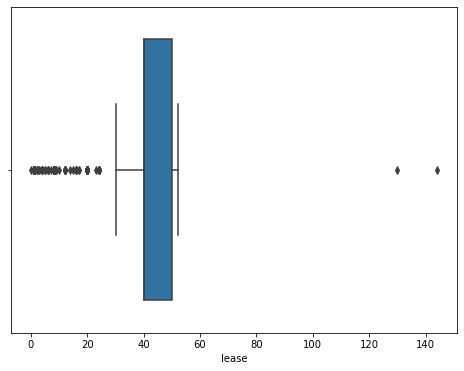

In [32]:
df2['lease'] = pd.to_numeric(df2['lease'], errors='coerce')
plt.figure(figsize=(8,6))
sns.boxplot(df2['lease'].dropna())
plt.show()

In [33]:
# Calculate the IQR
Q1 = df2['lease'].quantile(0.25)
Q3 = df2['lease'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Q1=',Q1)
print('Q3=',Q3)
print('IQR=',IQR)
print('Lower Bound=',lower_bound)
print('Upper_Bound=',upper_bound)

Q1= 40.0
Q3= 50.0
IQR= 10.0
Lower Bound= 25.0
Upper_Bound= 65.0


In [34]:
# Remove outliers
df2=df2[(df2['lease'] >= lower_bound) & (df2['lease'] <= upper_bound)]


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


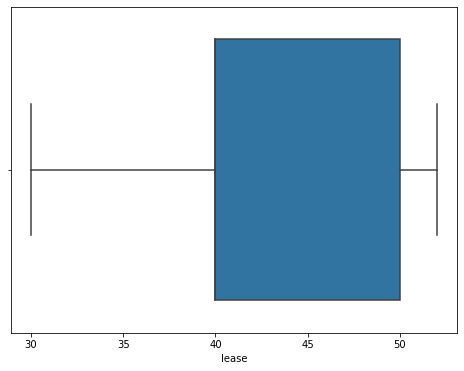

In [35]:
# Let's see now
plt.figure(figsize=(8,6))
sns.boxplot(df2['lease'])
plt.show()

### Let's remove the outliers in `budget` colum:

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


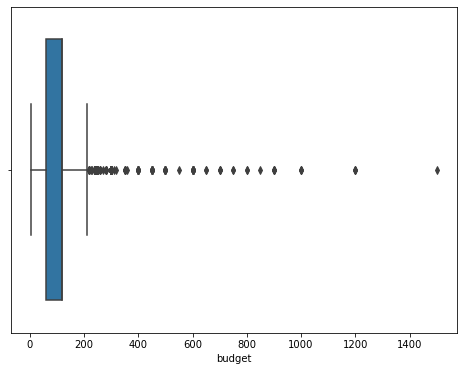

In [36]:
# Let's plot
plt.figure(figsize=(8,6))
sns.boxplot(df2['budget'])
plt.show()

In [37]:
# Calculate the IQR
Q1 = df2['budget'].quantile(0.25)
Q3 = df2['budget'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Q1=',Q1)
print('Q3=',Q3)
print('IQR=',IQR)
print('Lower Bound=',lower_bound)
print('Upper_Bound=',upper_bound)


Q1= 60.0
Q3= 121.0
IQR= 61.0
Lower Bound= -31.5
Upper_Bound= 212.5


In [38]:
# Remove outliers
df2=df2[(df2['budget'] >= lower_bound) & (df2['budget'] <= upper_bound)]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


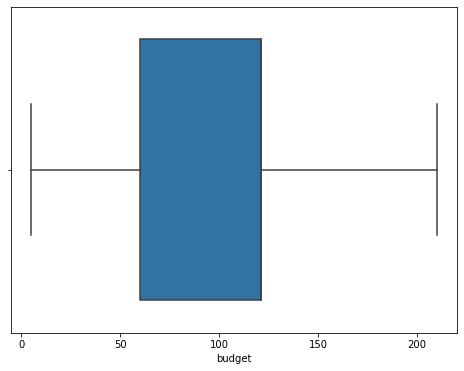

In [39]:
# Let's plot again
plt.figure(figsize=(8,6))
sns.boxplot(df2['budget'])
plt.show()

In [40]:
df2

,status,lost_reason,budget,lease,room_type_Ensuite,room_type_Entire Place,room_type_Studio
2,LOST,Not responding,121.0,40.0,1,0,0
7,LOST,Wants private accommodation,181.0,51.0,0,1,0
11,LOST,Not responding,121.0,40.0,1,0,0
12,LOST,Wants private accommodation,121.0,40.0,0,1,0
13,LOST,Not responding,181.0,50.0,0,1,0
...,...,...,...,...,...,...,...
46597,LOST,Low availability,121.0,40.0,1,0,0
46598,LOST,Not interested,60.0,40.0,0,1,0
46602,LOST,Wants private accommodation,121.0,40.0,0,1,0
46603,LOST,Low availability,60.0,50.0,0,0,1


<AxesSubplot:>

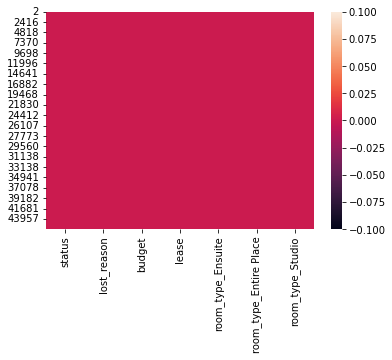

In [41]:
df2=df2.dropna()
sns.heatmap(df2.isnull())

## Step 7: Let's do final Encoding:

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['status'] = le.fit_transform(df2['status'])
df2['lost_reason'] = le.fit_transform(df2['lost_reason'])


### Let's see the dataset:

In [43]:
df_clean=df2
df_clean

,status,lost_reason,budget,lease,room_type_Ensuite,room_type_Entire Place,room_type_Studio
2,0,6,121.0,40.0,1,0,0
7,0,10,181.0,51.0,0,1,0
11,0,6,121.0,40.0,1,0,0
12,0,10,121.0,40.0,0,1,0
13,0,6,181.0,50.0,0,1,0
...,...,...,...,...,...,...,...
46597,0,2,121.0,40.0,1,0,0
46598,0,5,60.0,40.0,0,1,0
46602,0,10,121.0,40.0,0,1,0
46603,0,2,60.0,50.0,0,0,1


## Let's Save The `df_clean`  file:

In [71]:
df_clean.to_csv('lead_scoring_clean.csv', index=False)

### Let's see the `pairplot`:

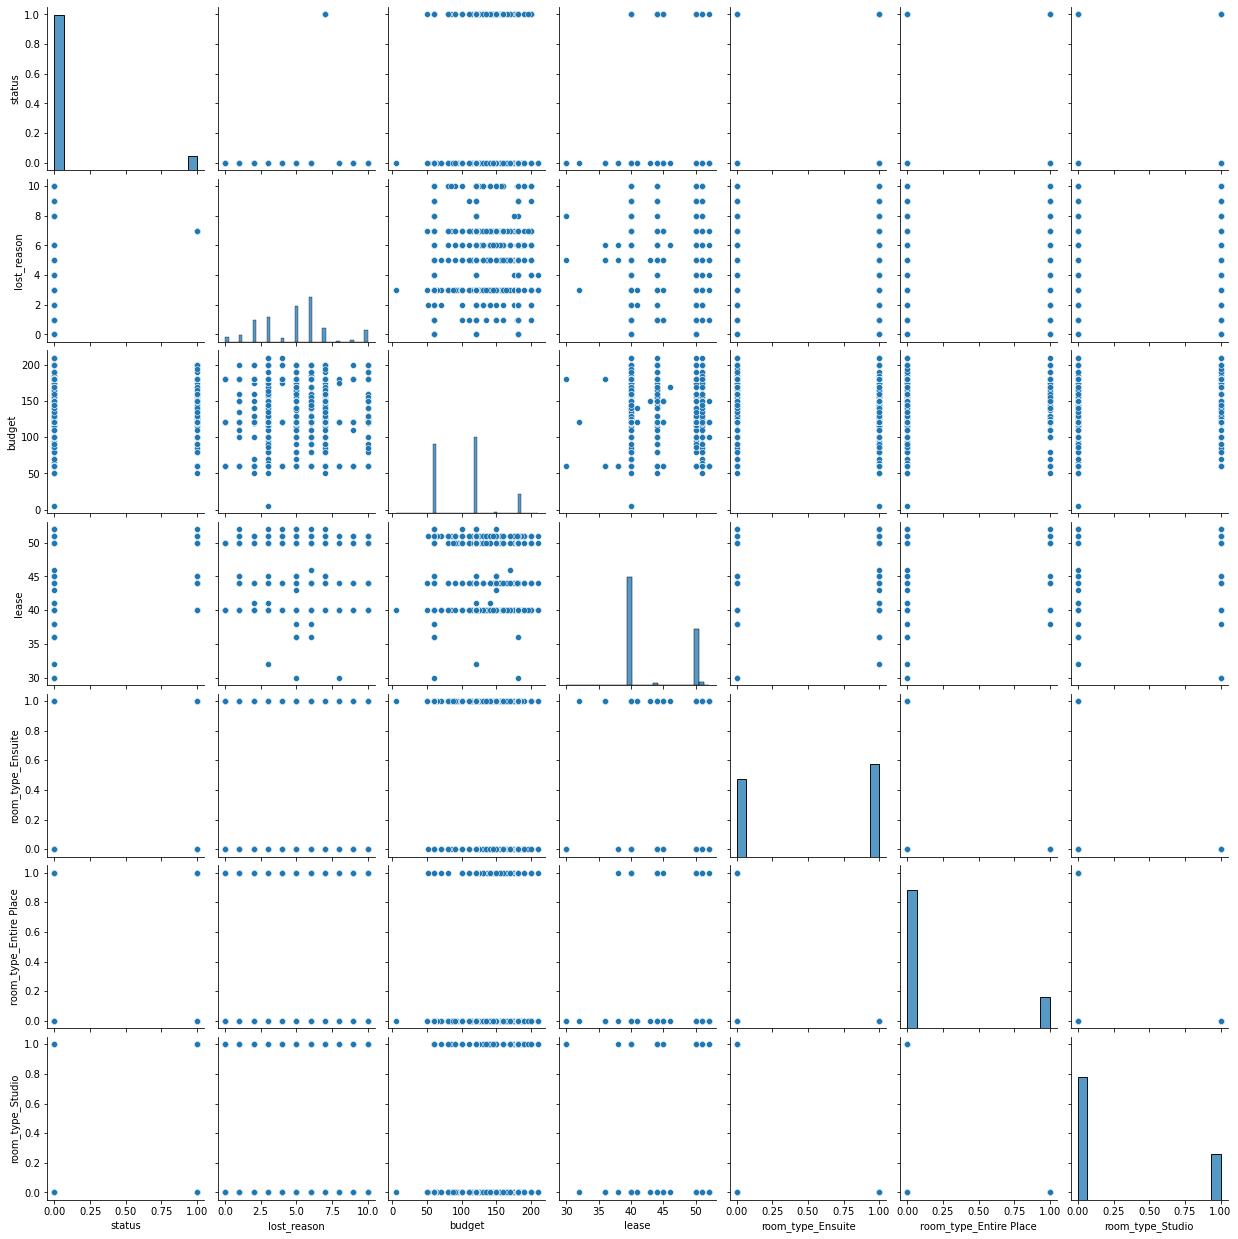

In [44]:
sns.pairplot(df_clean)

### Let's see the `Correlation Matrix`:

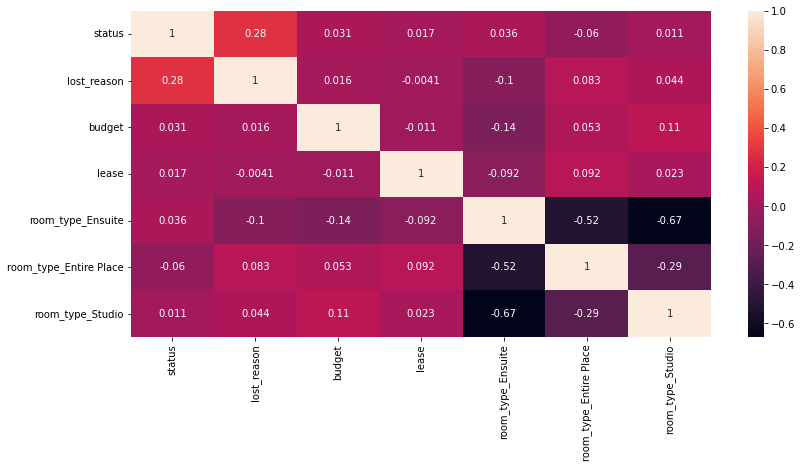

In [45]:
# Let's see the corelation matrix:
plt.figure(figsize=(13,6))
sns.heatmap(df_clean.corr(),annot=True);

## Step 8: Splitting The Dataset


In [46]:
# Spliting the dataset into Target(y) and Features(X) variable
X=df_clean.drop(columns=['status'],axis=1)
y=df_clean['status']

print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (14875, 6)
Shape of y: (14875,)


In [47]:
# Spliting into training and testing set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.25, random_state=5)

print('Shape of X_train=',X_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of X_train= (11156, 6)
Shape of y_train= (11156,)
Shape of X_test= (3719, 6)
Shape of y_test= (3719,)


## Step 9:  Training and Testing For Best Fit Model

### 1. Logistic Regression Model:

In [48]:
df_clean.status.value_counts()

0    13634
1     1241
Name: status, dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
X = df2.drop(columns=['status'], axis=1)
y = df2['status']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9028571428571428
Confusion Matrix:
 [[2686   21]
 [ 268    0]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
X_test.head(10)

,lost_reason,budget,lease,room_type_Ensuite,room_type_Entire Place,room_type_Studio
39690,7,181.0,50.0,1,0,0
12283,6,181.0,50.0,0,1,0
20883,6,121.0,40.0,0,1,0
45551,3,60.0,50.0,1,0,0
43488,5,121.0,40.0,0,0,1
40750,9,60.0,40.0,0,0,1
18897,3,60.0,40.0,1,0,0
14874,5,121.0,50.0,1,0,0
46091,4,60.0,50.0,1,0,0
3642,7,121.0,40.0,1,0,0


In [51]:
y_test.head(10)

39690    1
12283    0
20883    0
45551    0
43488    0
40750    0
18897    0
14874    0
46091    0
3642     1
Name: status, dtype: int32

In [52]:
y_pred_head = clf.predict(X_test.head(10))
y_pred_head

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 2.Gaussian Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
classifier_g = GaussianNB()
classifier_g.fit(X_train,y_train)

GaussianNB()

In [55]:
classifier_g.score(X_test, y_test)

1.0

In [56]:
y_test_g_head=y_test.head(20)
y_test_g_head

39690    1
12283    0
20883    0
45551    0
43488    0
40750    0
18897    0
14874    0
46091    0
3642     1
11192    0
28429    0
268      0
1698     0
36049    0
4128     1
29373    1
19355    0
40004    0
5236     0
Name: status, dtype: int32

In [57]:
y_pred_g_head = classifier_g.predict(X_test.head(20))
y_pred_g_head

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

###  Comparing The Predicted values with actual values:

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


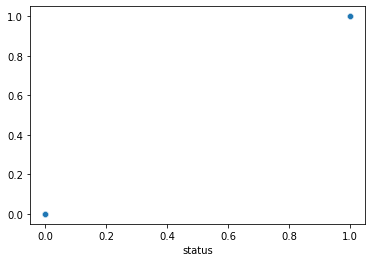

In [58]:
# Let's plot a scatter plot to visulize the predicted and actual value
sns.scatterplot(y_test_g_head,y_pred_g_head)
plt.show()

### Conclusion:
The accuracy of this model is 100% which is overfitting.

### 3. Multinomial Naive Bayes


In [59]:
from sklearn.naive_bayes import MultinomialNB

In [60]:
# let's train with Multinomial Naive Bayes Classifier Model
classifier_m=MultinomialNB()
classifier_m.fit(X_train,y_train)

MultinomialNB()

In [61]:
# Test our Multinomial Naive Bayes Model
classifier_m.score(X_test,y_test)

0.9099159663865546

### Conclusion:
The accuracy of the Multinomial Naive Bayes Model is 90.65% which is a good one but  let's try some other models.

### 4. Bernoulli Naive Bayes Classifier Model

In [62]:
from sklearn.naive_bayes import BernoulliNB

In [63]:
# Let's train our model
classifier_b=BernoulliNB()
classifier_b.fit(X_train, y_train)

BernoulliNB()

In [64]:
# Let's test our model
classifier_b.score(X_test,y_test)

0.9099159663865546

### Conclusion:
The accuracy of the Bernoulli Naive Bayes Classifier is 90.99% which is similar to Multinomial Naive Bayes Classifier Models.

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('status', axis=1), df_clean['status'], test_size=0.25, random_state=45)

# Create the decision tree classifier
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(X_train, y_train)

# Make predictions on the testing data
y_dtc_pred = dtc.predict(X_test)


# Evaluate the model using accuracy score and confusion matrix
dtc_accuracy = accuracy_score(y_test, y_dtc_pred)
dtc_cm = confusion_matrix(y_test, y_dtc_pred)

print("Accuracy:", dtc_accuracy)
print("Confusion Matrix:\n", dtc_cm)


Accuracy: 1.0
Confusion Matrix:
 [[3428    0]
 [   0  291]]


### Conclusion:
* The accuracy of the Decision Tree Classifier is 100% which is similar to GB Naive Bayes Classifier Models.
* But the Confusion Matrix looks impressive.
* So, I'll go with this model and try to evaluate further.

## Step 10: Using Evaluation Metrices on the choosen model

### Let's find the `F-Beta` for the Decision Tree Model:

In [66]:
# Let's import the library
from sklearn.metrics import fbeta_score

# Calculate F-beta score
fbeta = fbeta_score(y_test, y_dtc_pred, beta=2)

print("F-beta score for Decision Tree Classifier model: ", fbeta)

F-beta score for Decision Tree Classifier model:  1.0


### Let's find the `precision_score` for the Decision Tree Model:

In [67]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_dtc_pred, average='binary')
print("Precision score:", precision)

Precision score: 1.0


### Let's find the `recall_score` for Decision Tree Model:

In [68]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_dtc_pred)
print("Recall score:", recall)

Recall score: 1.0


### Let's find the `roc_auc_score` for the Decision Tree Model:

In [69]:
from sklearn.metrics import roc_auc_score

# Assuming X_test and y_test are the test data
y_pred_proba = dtc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score:", roc_auc)

ROC AUC score: 1.0


## Step 11: Pickling The Model 

### Pickling?
* Once we trained the model we need to save the model in a seprate file to use further or deploy in app.
* So, we use the `pickle method` and save our model with `.pkl` extession.

#### Syntax:

```
import pickle
pickle.dump(model_name, open('file_name.pkl','folder_name'))
```
where,  
pickle = Method   
dump =  saving  
model_name = lr/regression/LinearRegression  
file_name = Name of the file in which you want to save your model (eg,)  
folder_name= Name of the folder in which you want to save your file (eg, 'wb'= write bite (this store in the form of string) & this means if this file name is not exist in the current folder then create this one)

In [70]:
# Let's import the `pickle` library
import pickle
pickle.dump(dtc,open('lead_scoring_model.pkl','wb'))

## Step 12: Let's Load & Test The Pickle Model

In [73]:
# Loading the pickle file
pickled_model=pickle.load(open('lead_scoring_model.pkl','rb'))

In [78]:
# Prediction
Predicted_Status=pickled_model.predict(X_test.head(20))
Predicted_Status

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [81]:
y_test.head(20)

13439    0
12057    0
9707     0
10607    0
32321    0
12370    1
12452    0
2039     1
40569    0
30699    0
26142    0
12675    0
17661    0
26967    1
40399    0
32194    0
19512    0
25870    0
7926     0
5217     0
Name: status, dtype: int32

## Conclusion:
* We can see our model is predicting to the actual values.
* Here we have pickeled the model and tested. 
* Once we satified with the model then we can deploy this model using Flask on web platforms (like- AWS, Heroku, Render, etc.)
* Note that the WIN dataset is comparatively lesser then the LOSS dataset.
* So, we can collect more data to get the best result.
* Also, we can collect some more information about the customers (like- location, Income, and platforms, etc.) to make our model more dynamic.

## About Me:
**Name:** Hariom  
**Email:** sonihariom555@gmail.com  
**Contact No.:** 9956661272  
**Portfolio:**[portfolio.sonihariom.me](https://portfolio.sonihariom.me/about)  

```
Thank You!
```